# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `2` | `Questions`

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### <font color = "blue"> `IMPORT` your dataset: `bank_loan.csv`. </font>

In [2]:
bank_loan = pd.read_csv('bank_loan.csv')

<ipython-input-2-e7c5aa51b202>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  bank_loan = pd.read_csv('bank_loan.csv')


### Question 1. Data `Inspection`

#### Question 1.1. How would you look at the first few rows of the DF?

In [3]:
%whos

Variable    Type         Data/Info
----------------------------------
bank_loan   DataFrame                id  member_id<...>39717 rows x 111 columns]
np          module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd          module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt         module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns         module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


In [4]:
bank_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Question 1.2. How would you look at all the column names?

In [5]:
bank_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Question 2. Data `Wrangling`

#### Question 2.1. How would you check the number of missing values in each column?

In [6]:
bank_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
missing_values_count = bank_loan.isnull().sum()

> There are columns have a large number of missing values 

> Let's clean them first.

#### Question 2.2. How would you find the percentage of missing values in each column? 
> Hint: Use the missing values and divide it by something.

In [8]:
missing_pct = (missing_values_count/len(bank_loan)) * 100
missing_pct
# Defined as missing_value_counts 

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### Question 2.3. How would you remove the columns having more than 90% missing values?

In [9]:
bank_loan_cleaned_90 = bank_loan.drop(\
             columns = missing_pct[missing_pct > 90].index)
bank_loan_cleaned_90

# Create a new DataFrame, named bank_loan_cleaned_90
# Call method .drop on bank_loan
# .drop() arguments would take in the missing_pct columns have value of > 90
# missing_pct is defined above, obtains pct of missing data on per column

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check the number of missing values again.

In [10]:
missing_values_cleaned_count = bank_loan_cleaned_90.isna().sum()
missing_values_cleaned_count

# sum of count of null values in each column

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Question 2.4. How would you remove columns having more than 30% of missing values?
> Hint: With so **few** columns with more than 30% missing values, can you `drop` them by **name**?

In [11]:
missing_values_cleaned_count/len(bank_loan_cleaned_90)*100

# percentage form of null values in each column

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
bank_loan_cleaned_30 = bank_loan_cleaned_90.drop(columns = ['desc', 'mths_since_last_delinq'], axis=1)
bank_loan_cleaned_30

# 'desc', 'mths_since_last_deliq' are the only columns with >30% null values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check number of missing values again, does all columns have **less than** 90% missing values?

In [13]:
bank_loan_cleaned_30.isna().sum()/len(bank_loan_cleaned_30)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

#### Question 2.5. How would you check missing values rows-wise, by the way?
> Hint: What does the `axis` argument do?

In [14]:
bank_loan_cleaned_30.isna().sum(axis=1)

# sum(axis = 0) sums missing values columns-wise (default)
# sum(axis = 1) sums missing values rows-wise

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

> How would you check whether some rows have more than 5 missing values

In [15]:
bank_loan_cleaned_30.isna().sum(axis=1) > 5
#Length: 39717, all rows have no more than 5 missing values

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

> The dataset is cleaned now; let's check whether all the columns are in the correct format or not.

In [16]:
bank_loan_cleaned_30.info()
# bank_loan_cleaned_30.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

> The column `int_rate` is character type, let's convert it to float.

#### Question 2.6. How would you use `lambda` to convert the data type of `int_rate`?

In [17]:
type(bank_loan_cleaned_30['int_rate'][0])

str

In [18]:
bank_loan_cleaned_30['int_rate'].head()

# cannot perform float() on str type with '%'

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [19]:
bank_loan_cleaned_30['int_rate'] = bank_loan_cleaned_30['int_rate'].str.rstrip('%')

# Strip '%' from 'int_rate' column

In [20]:
bank_loan_cleaned_30['int_rate_float'] = bank_loan_cleaned_30['int_rate'].apply(lambda x:float(x))

# Create new column to contain the float format of 'int_rate'

> Let's check the data types again.

In [21]:
bank_loan_cleaned_30.dtypes

# 'int_rate_float' is int64

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

> Lets extract the numeric part from the variable employment length.

> First, let's drop the missing values from the column (otherwise the regex code below throws error) using regular expression to extract numeric values from the string convert to numeric

In [22]:
import re

In [23]:
drop_emp_length_missing = bank_loan_cleaned_30.dropna(subset = ['emp_length'], inplace=False)

# Drop null values from original dataframe, and create a new one

In [24]:
drop_emp_length_missing

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_float
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.27
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,8.07
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,10.28
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,8.07
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,7.43


In [25]:
drop_emp_length_missing['emp_length_numeric'] = drop_emp_length_missing['emp_length'].str.extract('(\d+)', expand=False).astype(int)
drop_emp_length_missing

<ipython-input-25-e42f07a1dea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_emp_length_missing['emp_length_numeric'] = drop_emp_length_missing['emp_length'].str.extract('(\d+)', expand=False).astype(int)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_float,emp_length_numeric
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.27,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,8.07,4
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,10.28,3
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,8.07,1
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN,7.43,1


> Let's take a look at type of the columns again

In [26]:
bank_loan_cleaned_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Question 3. Exploratory Data Analysis (EDA)

> There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [27]:
variables_to_remove = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

variables_to_remove

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

#### Question 3.1. How would you remove the set of variables from `variables_to_remove` from the dataset?

In [28]:
bank_loan_cleaned = drop_emp_length_missing.drop(columns = variables_to_remove, axis=1)
bank_loan_cleaned

# Call .drop and remove 'variables_to_remove' columns defined above

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_float,emp_length_numeric
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,f,0.0,1,0,0.0,0,0.0,0.0,10.65,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,f,0.0,1,0,0.0,0,0.0,0.0,15.27,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,f,0.0,1,0,0.0,0,0.0,0.0,15.96,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,f,0.0,1,0,0.0,0,0.0,0.0,13.49,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,f,0.0,1,0,0.0,0,0.0,0.0,12.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,8.07,4
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,f,NaN,1,0,NaN,0,NaN,NaN,10.28,3
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,8.07,1
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,f,NaN,1,0,NaN,0,NaN,NaN,7.43,1


#### Question 3.2. Are there any other variables that we can remove from the dataset also?

-  Also, we won't use the variables zip code, address, state etc. 
-  The variable `title` is derived from the variable `purpose` thus let get rid of all these variables as well

In [29]:
bank_loan_cleaned_2 = bank_loan_cleaned.drop(columns = ['zip_code', 'addr_state', 'title'], axis=1)
bank_loan_cleaned_2

# Call .drop function & row names, 'zip_code', 'addr_state' & 'title'
# Remember not to drop 'purpose', like Prof Roh usually says, don't lose your 'purpose' in class

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_float,emp_length_numeric
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,f,0.0,1,0,0.0,0,0.0,0.0,10.65,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,f,0.0,1,0,0.0,0,0.0,0.0,15.27,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,f,0.0,1,0,0.0,0,0.0,0.0,15.96,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,f,0.0,1,0,0.0,0,0.0,0.0,13.49,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,f,0.0,1,0,0.0,0,0.0,0.0,12.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,8.07,4
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,f,NaN,1,0,NaN,0,NaN,NaN,10.28,3
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,8.07,1
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,f,NaN,1,0,NaN,0,NaN,NaN,7.43,1


#### Question 3.3. Let's have a look at the target variable--`loan_status`. 

> Objecive: Re-label the values to a `binary form`: namely, `0` or `1`, 
>
> - 1 indicating that the person has defaulted and 
> - 0 otherwise.

But first, what makes up the target variable--`loan_status`?

In [30]:
bank_loan_cleaned_2['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

> You should be able to see that `fully paid` comprises most of the loans. 

> The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans. 

> Hence, we will have two categories to label as 0 or 1.

- Filter for `Fully Paid` and `Charged Off` 
- Using `lambda`, let's label `Fully Paid` and `Charged Off`

In [31]:
filtered_loan_status = bank_loan_cleaned_2.query("loan_status != 'Current'")
filtered_loan_status

# .query() method to query the dataframe for 'loan_status' column != 'Current'
# return rows that do not contain 'Current'

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_float,emp_length_numeric
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,f,0.0,1,0,0.0,0,0.0,0.0,10.65,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,f,0.0,1,0,0.0,0,0.0,0.0,15.27,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,f,0.0,1,0,0.0,0,0.0,0.0,15.96,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,f,0.0,1,0,0.0,0,0.0,0.0,13.49,10
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,f,0.0,1,0,0.0,0,0.0,0.0,7.90,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,8.07,4
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,f,NaN,1,0,NaN,0,NaN,NaN,10.28,3
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,8.07,1
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,f,NaN,1,0,NaN,0,NaN,NaN,7.43,1


In [32]:
filtered_loan_status['loan_status_label']= filtered_loan_status['loan_status'].apply(lambda x: 
                                          0 if x == 'Fully Paid' else 1)

# Lambda to apply if else function, to label loans as binary 0, 1 (0 for 'Fully Paid', 1 for 'Charged off')

<ipython-input-32-3802fb58ebcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['loan_status_label']= filtered_loan_status['loan_status'].apply(lambda x:


> Let's convert `loan_status` to **integer data type** (again, use `lambda`).

In [33]:
filtered_loan_status.loan_status_label.apply(lambda x:int(x))

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status_label, Length: 37544, dtype: int64

> Let's take a look at the data points under the `loan_status` category.

In [34]:
filtered_loan_status.groupby('loan_status')['loan_status'].value_counts()

loan_status
Charged Off     5399
Fully Paid     32145
Name: count, dtype: int64

### Question 4. A Simple Univariate Analysis

> First, let's look at the overall default rate.

#### Question 4.1. How would you calculate default rate? Please use `numpy` module.

In [35]:
default_rate = np.divide(\
                         np.sum(filtered_loan_status['loan_status_label']), len(filtered_loan_status['loan_status_label']))

print("Default Rate: {:.2%}".format(default_rate))

# 'loan_status_label' is a binary column of 0s and 1s
# Performn value_counts of our new column 'loan_status_label'
# 0 = No Default, 1 = Default
# np.sum adds the 0s and 1s, which obtain the total number of defaults
# Divide the total sum of defaults by the len('loan_status_label'), which is the total count of loans.\
# Essentially, No. of defaults / No. of loans

Default Rate: 14.38%


> The overall default rate is about `??%`.  

> Let's visualize default rates across grade of the loan.

In [36]:
grade_default_rate = (filtered_loan_status
                      .groupby('grade')['loan_status_label']
                      .apply(lambda x: (x == 1).mean()*100)
                      .reset_index())

In [37]:
grade_default_rate

,grade,loan_status_label
0,A,5.776398
1,B,11.928867
2,C,16.794889
3,D,21.791524
4,E,26.717557
5,F,32.638165
6,G,33.557047


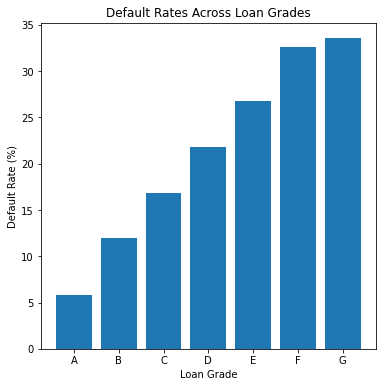

In [38]:
plt.figure(figsize=(6,6))
plt.bar(grade_default_rate['grade'], grade_default_rate['loan_status_label'])
plt.title('Default Rates Across Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate (%)')
plt.show()

#### Question 4.2. Create a function to plot `loan_status` across `any categorical variable`.
> Hint: How did you visualise in Question 4.1? Is there a way to generalise what you did for `any categorical variable`?

In [39]:
def plot_default_rate (cat_var):
    catvar_default_rate = (filtered_loan_status.
                           groupby((cat_var))['loan_status_label'].
                           apply(lambda x: (x == 1).mean()*100).
                           reset_index())
    
    plt.figure(figsize=(8,6))
    plt.bar(catvar_default_rate[(cat_var)], catvar_default_rate['loan_status_label'])
    plt.title(f"Default Rates Across {cat_var}")
    plt.xlabel((cat_var))
    plt.ylabel('Default Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

#### How's default rates across `grade` of loan? Use your newly created function :)

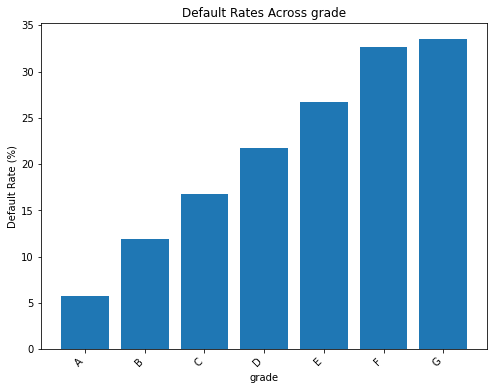

In [40]:
plot_default_rate('grade')

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

As the grade of the loan gets worse (in alphabetical order, A being best, G being worst), the default rate goes up

#### `term`

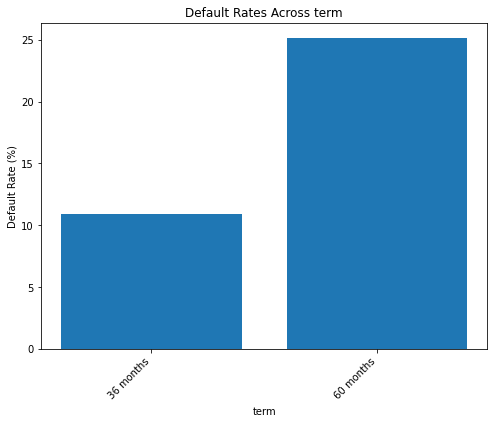

In [41]:
plot_default_rate('term')

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

 As loan term goes up, default rate goes up

#### `home_ownership` 

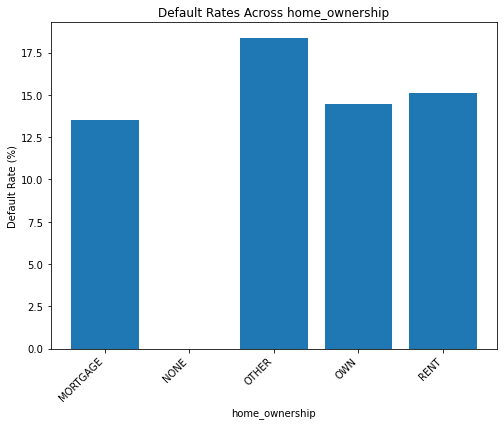

In [42]:
plot_default_rate('home_ownership')

In [43]:
filtered_loan_status['home_ownership'].value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

When borrowers do not own a home, it is unlikely for them to be loaining. Therefore, default rate tends to 0.

However, upon analysis of the count of borrowers with no home, the sample size is small, which is not a good representation of the default rate of borrowers with no home, as the results may be skewed.

#### The role of `verification_status`? 

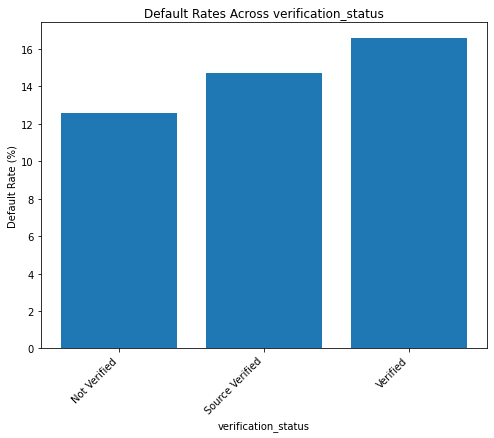

In [44]:
plot_default_rate('verification_status')

In [45]:
filtered_loan_status['verification_status'].value_counts()

verification_status
Not Verified       16278
Verified           11772
Source Verified     9494
Name: count, dtype: int64

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

The pattern that emerges from this dataset is counter-intuitive. Verified borrowers are defaulting more than non-verified borrowers. Therefore, verification status is not a good representation of the tendency of default.

Another possibility is that borrowers that take on smaller loans might not need verification, and these loans are easier to pay off.

#### The role of Loan `purpose`?

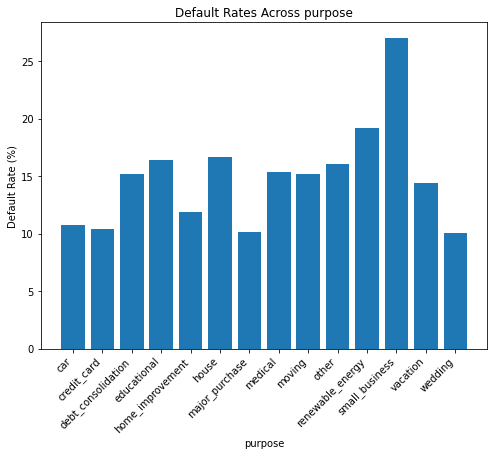

In [46]:
plot_default_rate('purpose')

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Small business loans have the highest default rates across all loan purposes. Small businesses are inherently risky, hence a higher possibility of default.

However, such data might not always stand true in the long-term, as spending trends change over time. This could be affected by the current economic conditions.

#### Question 4.3. How is the distribution of loans across time?

> Please convert the column `issue_d` into datetime and then extract year and month from it.

In [47]:
import datetime

In [48]:
filtered_loan_status['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [49]:
pd.to_datetime(filtered_loan_status['issue_d'], format = ('%b-%y'))

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

> Yes, please use `lambda`.

In [50]:
filtered_loan_status.issue_d.apply(lambda x :pd.to_datetime(x, format = ('%b-%y')))

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

> Please extract month and year from `issue_d`, using `lambda`.

In [51]:
filtered_loan_status['issue_d_year'] =\
filtered_loan_status.issue_d.apply(\
                                   lambda x :pd.to_datetime(x, format = ('%b-%y')).year)

<ipython-input-51-c1fa32ec6b41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['issue_d_year'] =\


In [52]:
filtered_loan_status['issue_d_month'] = \
filtered_loan_status.issue_d.apply(\
                                   lambda x :pd.to_datetime(x, format = ('%b-%y')).month)

<ipython-input-52-d65f1f6cf6f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['issue_d_month'] = \


> How would you examine the number of loans granted across `years`?

In [53]:
filtered_loan_status['issue_d_year'].value_counts()

issue_d_year
2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

You can see that the number of loans has increased steadily across years. 

> How would you examine the number of loans across months?

In [54]:
filtered_loan_status['issue_d_month'].value_counts()

issue_d_month
12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: count, dtype: int64

`Interpretation`?

Number of loans are the lowest in January, trending upwards and reaching its highest in December

#### Compare the default rates across years.

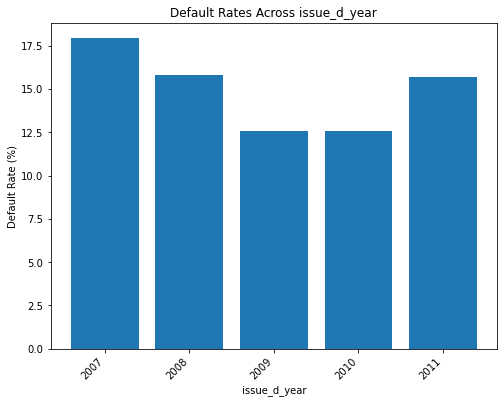

In [55]:
plot_default_rate('issue_d_year')

> `Interpretation`?

Default rate was the highest in 2007, tending to its lowest in 2009 & 2010, before seeing an uptick in 2011

Default rate was at its peak in 2007, as interest rates were near its peak. In the following years, interest rates went down which encouraged more borrowing & loan repayments became easier. Therefore, the default rate trended downwards in 2009 & 2010. In 2011, the Euro Debt Crisis happened, causing default rates to go up.

#### Let's compare default rates across months.

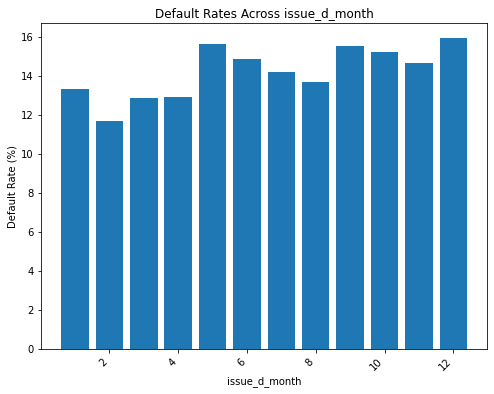

In [56]:
plot_default_rate('issue_d_month')

> `Interpretation`? 

There is no observable pattern when visualising the default rate across months.

#### Question 4.4. Let's now analyse how the default rate varies across continuous variables.

> Loan Amount: `loan_amnt`

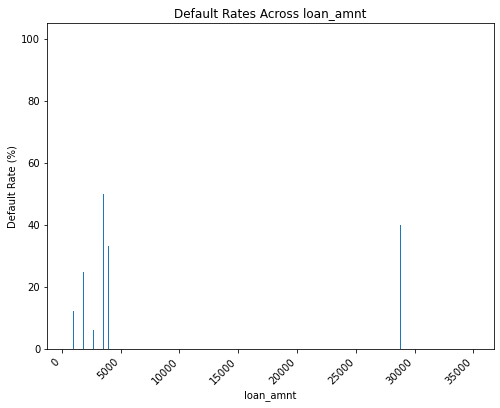

In [57]:
plot_default_rate('loan_amnt')

> `Interpretation`?

There is no meaningful interpretation from the graph, as there is too small of a sample size for each loan amount.

> Another way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.

* loan_amount < 5000 `low`
* loan_amount >=5000 and loan_amount < 15000 `medium`
* loan_amount >= 15000 and loan_amount < 25000 `high`
* greater than 25000 `very high`

In [58]:
filtered_loan_status['loan_amount_group'] = pd.cut\
                                                   (filtered_loan_status['loan_amnt'], \
                                                   bins = [0, 5000, 15000, 25000, float('Inf')], \
                                                   labels = ['low', 'medium', 'high', 'very high'])

<ipython-input-58-b8613489448f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['loan_amount_group'] = pd.cut\


In [59]:
filtered_loan_status['loan_amount_group']

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: loan_amount_group, Length: 37544, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

> Let's compare the default rates across loan amount type

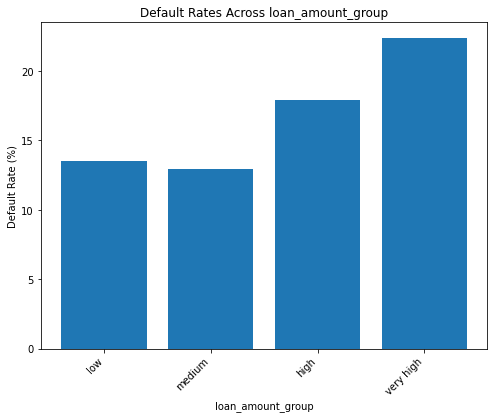

In [60]:
plot_default_rate('loan_amount_group')

> `Interpretation`?

As the loan amount increases, the default rate increases, as the loan installment amount goes up, causing tendency of default goes up.

Another perspective says that as an individual's loan amount goes up, this becomes a moral hazard. Borrowers can opt to declare bankruptcy, which is a loophole to not pay off the loan. Bankruptcy affects an individual's reputation, but that might matter less to an individual, than the loan repayment amount. Therefore, a higher tendency to default on their loan.

#### Let's also convert funded amount invested to bins (using the same scheme from `loan_amount`)

In [61]:
filtered_loan_status['funded_amount_group'] = pd.cut\
                                                   (filtered_loan_status['funded_amnt'], \
                                                   bins = [0, 5000, 15000, 25000, float('Inf')], \
                                                   labels = ['low', 'medium', 'high', 'very high'])

<ipython-input-61-4583f7827d7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['funded_amount_group'] = pd.cut\


In [62]:
filtered_loan_status['funded_amount_group']

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: funded_amount_group, Length: 37544, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

> Visualize the results

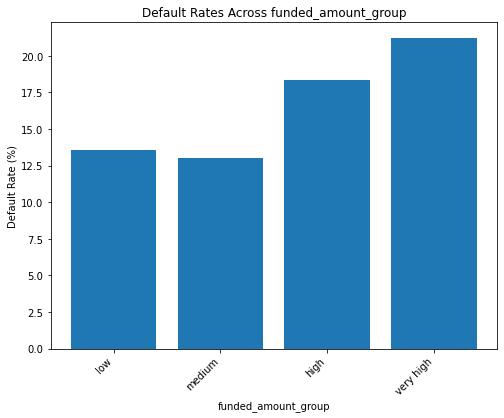

In [63]:
plot_default_rate('funded_amount_group')

#### Interest Rate (int_rate)

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=15 `medium`
* greater than 15 `high`

> Use lambda for creating a new categorical variable.

In [64]:
filtered_loan_status['int_rate_group'] = filtered_loan_status['int_rate_float'].apply(lambda x:
                                                                                'low' if x < 10
                                                                           else ('medium' if 10 < x <= 15
                                                                           else 'high'))

<ipython-input-64-ad1d27a50602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['int_rate_group'] = filtered_loan_status['int_rate_float'].apply(lambda x:


In [65]:
filtered_loan_status['int_rate_group']

0        medium
1          high
2          high
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: int_rate_group, Length: 37544, dtype: object

> Let's compare default rates across rates of interest

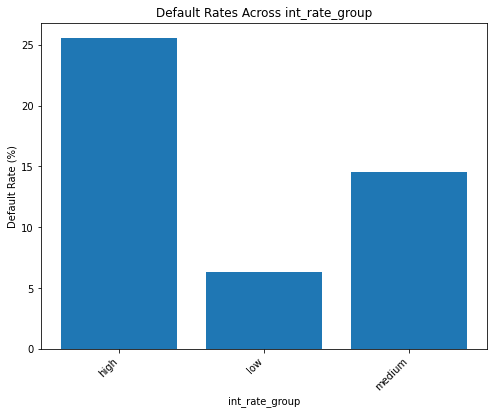

In [66]:
plot_default_rate('int_rate_group')

> `Interpretaion`?

For borrowers with lower interest rates, their default rate is lower, as loan repayment installments are lower, therefore making it easier on the borrower to pay off. Higher interest rate loans also tend to be more risky, which is evaluated by a bank's credit model.

#### debt-to-income (`dti`) ratio

> Please create a categorical variable of `dti` using your own function

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=20 `medium`
* greater than 20 `high`

> Use lambda for creating a new variable.

In [67]:
filtered_loan_status['dti_group'] = filtered_loan_status['int_rate_float'].apply(lambda x:
                                                                                'low' if x < 10
                                                                           else ('medium' if 10 < x <= 15
                                                                           else 'high'))

<ipython-input-67-0e878a153447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['dti_group'] = filtered_loan_status['int_rate_float'].apply(lambda x:


In [68]:
filtered_loan_status['dti_group']

0        medium
1          high
2          high
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: dti_group, Length: 37544, dtype: object

> Let's comparing default rates across debt to income ratio

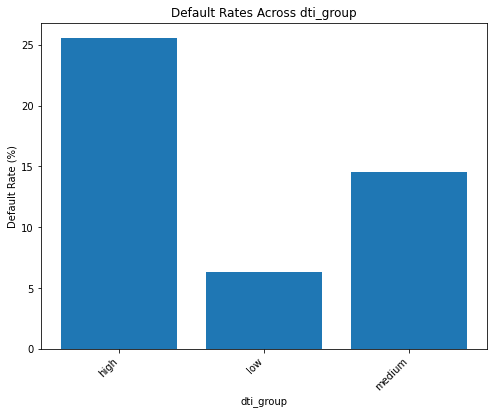

In [69]:
plot_default_rate('dti_group')

> `Interpretation`?

As a borrower's debt to income ratio is lower, their ability to pay off a loan is higher. Therefore, a lower default rate for the lower "dti" groups.


#### `funded_amount`

> Please create a categorical variable of `funded_amount` using your own function

> Use the following definitions for each categories.

- <= 5000 `low`
- funded_amount > 5000 and funded_amount <=15000 `medium`
- greater than 15000 `high`

> Use lambda for creating a new variable.

In [70]:
filtered_loan_status['funded_amount_group_2'] = filtered_loan_status['funded_amnt'].apply(lambda x:
                                                                                'low' if x <= 5000
                                                                           else ('medium' if 5000 < x <= 15000
                                                                           else 'high'))

<ipython-input-70-0649bb8aea0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['funded_amount_group_2'] = filtered_loan_status['funded_amnt'].apply(lambda x:


In [71]:
filtered_loan_status['funded_amount_group']

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: funded_amount_group, Length: 37544, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'very high']

#### `installment`

> Please create a categorical variable of `installment` using your own function

> Use the following definitions for each categories.

- installment <= 200 `low`
- installment > 200 and installment <= 400 `medium`
- installment > 400 and installment <= 600 `high`
- greater than 600 = `very high`

> Use lambda for creating a new variable.

In [72]:
filtered_loan_status['installment_group'] = filtered_loan_status['installment'].apply(lambda x:
                                                                                'low' if x <= 200
                                                                           else ('medium' if 200 < x <= 400
                                                                           else ('high' if 400 < x <= 600
                                                                           else 'very high')))

<ipython-input-72-65224795d2fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['installment_group'] = filtered_loan_status['installment'].apply(lambda x:


In [73]:
filtered_loan_status['installment_group']

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: installment_group, Length: 37544, dtype: object

> Let's compare default rates across installment

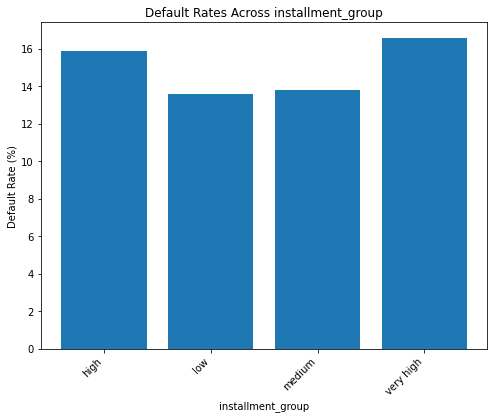

In [74]:
plot_default_rate('installment_group')

> `Interpretation`?

Default rate increases as the borrower's payable installment amount goes up.

#### How about `annual_income`? 

> Please create a categorical variable of annual_income using your own function

> Use the following definitions for each categories.

- less than or equal to 50k = `low`
- greater than 50k less than equal to 100 k = `medium`
- greater than 100k less than equal to 150k = `high`
- greater than 150k = `very high`

> Use lambda for creating a new variable.

In [75]:
filtered_loan_status['annual_inc_group'] = filtered_loan_status['annual_inc'].apply(lambda x:
                                                                                'low' if x <= 50000
                                                                           else ('medium' if 50000 < x <= 100000
                                                                           else ('high' if 100000 < x <= 150000
                                                                           else 'very high')))

<ipython-input-75-fb3b0b7866e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['annual_inc_group'] = filtered_loan_status['annual_inc'].apply(lambda x:


In [76]:
filtered_loan_status['annual_inc_group']

0              low
1              low
2              low
3              low
5              low
           ...    
39712         high
39713          low
39714       medium
39715    very high
39716          low
Name: annual_inc_group, Length: 37544, dtype: object

> Visualize the results.

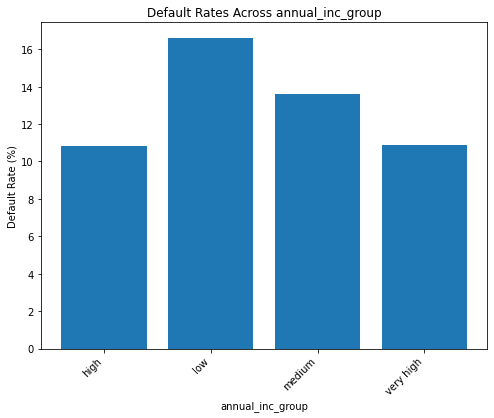

In [77]:
plot_default_rate('annual_inc_group')

> What's your interpretation?

Default rate goes down as their income level increases. Borrower's income affects their ability to pay off their loan.

#### `Employment Length`

> First, let's drop the missing value observations in `emp_length`

In [78]:
filtered_loan_status.dropna(subset='emp_length', inplace = True)

# Call .drop method to drop rows containing null values in 'emp_length'

<ipython-input-78-3caa5cc8839b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status.dropna(subset='emp_length', inplace = True)


> Please create a categorical variable of `emp_length` using your own function

> Use the following definitions for each categories.

* emp_length <= 1 `fresher`
* emp_length > 1 and emp_length <=3 `junior`
* emp_length > 3 and emp_length <=7 `senior`
* greater than 7 `expert`

> Use lambda for creating a new variable.

In [79]:
filtered_loan_status['emp_length_group'] = filtered_loan_status['emp_length_numeric'].apply(lambda x:
                                                                                'fresher' if x <= 1
                                                                           else ('junior' if 1 < x <= 3
                                                                           else ('senior' if 3 < x <= 7
                                                                           else 'expert')))

<ipython-input-79-1de257490ae8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_status['emp_length_group'] = filtered_loan_status['emp_length_numeric'].apply(lambda x:


> Visualize the results

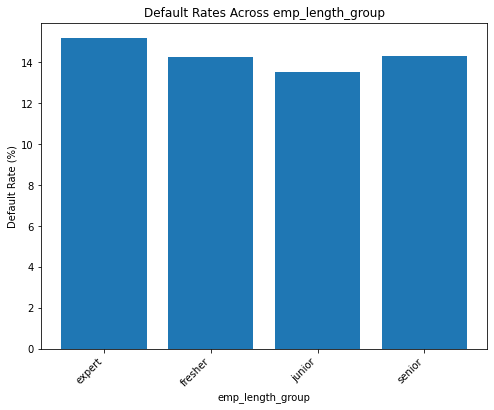

In [80]:
plot_default_rate('emp_length_group')

> What's your `interpretation`?

There is no observable trend.

### Question 5. Segmented Univariate Analysis



#### Question 5.1. A quick glance on Loan Purpose (`purpose`) using your first function :)

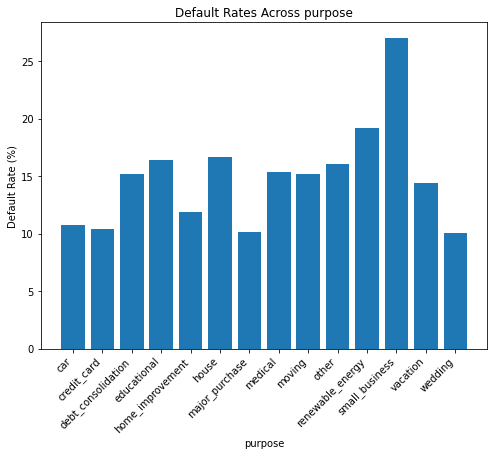

In [81]:
plot_default_rate('purpose')

`Interpretation`?

Refer to above

#### Question 5.2. Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

> Let's take a look at the number of loans for each type (purpose) of the loan.

In [82]:
filtered_loan_status['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

As we can see, the result is automatically sorted in descending order.
    This is because by default, the parameter sort = True.

> Please analyze the top 4 types of loans based on purpose

#### Let's filter the df for the 4 types of loans mentioned above

In [83]:
top_4_purpose_index = filtered_loan_status['purpose'].value_counts().head(4).index
top_4_purpose_index

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement'], dtype='object', name='purpose')

In [84]:
top_4_purpose = filtered_loan_status[filtered_loan_status['purpose'].isin(top_4_purpose_index)]

In [85]:
# Alternatively, we can type down the 4 types manually :)

# top_4_purpose = filtered_loan_status[
#     filtered_loan_status['purpose'].isin(['debt_consolidation', 'credit_card', 'other', 'home_improvement'])
# ]

#### Visualize the number of loans by purpose 

<AxesSubplot:xlabel='purpose'>

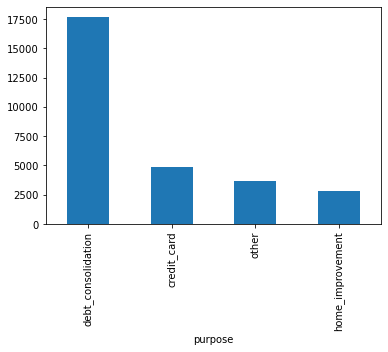

In [86]:
filtered_loan_status['purpose'].value_counts().head(4).plot(kind='bar')

> let's now compare the default rates (`loan_status`) across two types of categorical variables;
> - `purpose` of loan (constant)
> - another categorical variable (which changes)

In [87]:
# For example, we will use 'term' as the categorical variable
filtered_loan_status.groupby(['term', 'purpose'])['loan_status_label'].mean()

term        purpose           
 36 months  car                   0.082809
            credit_card           0.074567
            debt_consolidation    0.110004
            educational           0.151815
            home_improvement      0.096421
            house                 0.112903
            major_purchase        0.076185
            medical               0.131890
            moving                0.143478
            other                 0.129599
            renewable_energy      0.173913
            small_business        0.216239
            vacation              0.121212
            wedding               0.078103
 60 months  car                   0.153846
            credit_card           0.232533
            debt_consolidation    0.262112
            educational           0.428571
            home_improvement      0.175938
            house                 0.292453
            major_purchase        0.203390
            medical               0.229730
            moving     

> You should be able to write your own function which takes a categorical variable and plots the default rate segmented by purpose.

> Please **create your function** named `plot_segmented`

In [88]:
def plot_segmented(cat_var):
    df_purpose = top_4_purpose.groupby([(cat_var), 'purpose'])['loan_status_label'].mean().reset_index()
    df_purpose['loan_status_label'] = df_purpose['loan_status_label']*100
    pivot_df = df_purpose.pivot(index = (cat_var), columns = 'purpose', values = 'loan_status_label')
    ax = pivot_df.plot(kind = 'bar', figsize = (8, 6))
    plt.xlabel((cat_var))
    plt.ylabel('Default Rate (%)')
    plt.title('Default Rates by ' + str(cat_var) + ' and Purpose')
    plt.legend(title='Purpose')
    plt.show()

In [89]:
# Example using 'term' as the categorical variable
df_purpose2 = top_4_purpose.groupby(['term', 'purpose'])['loan_status_label'].mean().reset_index()
df_purpose2['loan_status_label'] = df_purpose2['loan_status_label']*100
df_purpose2 # output is a 8x3 dataframe

,term,purpose,loan_status_label
0,36 months,credit_card,7.456691
1,36 months,debt_consolidation,11.000389
2,36 months,home_improvement,9.642147
3,36 months,other,12.959894
4,60 months,credit_card,23.253275
5,60 months,debt_consolidation,26.211180
6,60 months,home_improvement,17.593790
7,60 months,other,29.454023


In [90]:
pivot_df2 = df_purpose2.pivot(index = 'term', columns = 'purpose', values = 'loan_status_label')
pivot_df2 # output is a 2x4 matrix

purpose,credit_card,debt_consolidation,home_improvement,other
term,,,,
36 months,7.456691,11.000389,9.642147,12.959894
60 months,23.253275,26.211180,17.593790,29.454023


> Let's use the function to see if there's differences in the term.

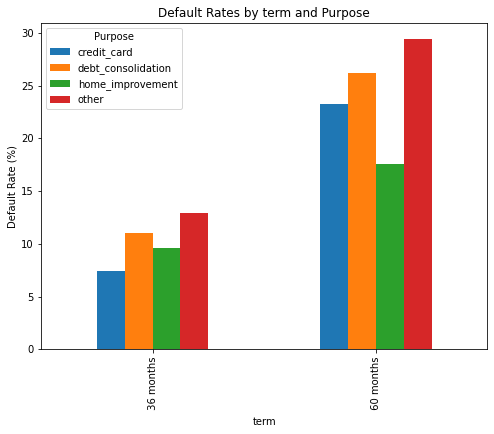

In [91]:
plot_segmented('term')

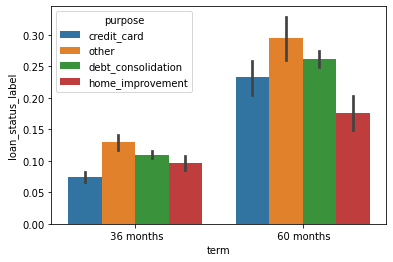

In [92]:
# Alternatively, we can also use seaborn  
def plot_segmented_seaborn(variable):
    sns.barplot(
    x=variable,
    y='loan_status_label',
    hue='purpose',
    data=top_4_purpose,
)
plot_segmented_seaborn('term')

#### Grade of Loan (`grade`)

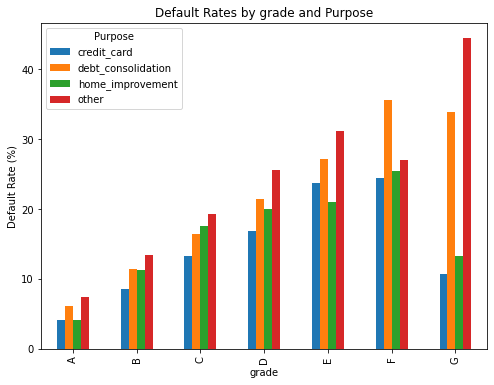

In [93]:
plot_segmented('grade')

#### home ownership(`home_ownership`)

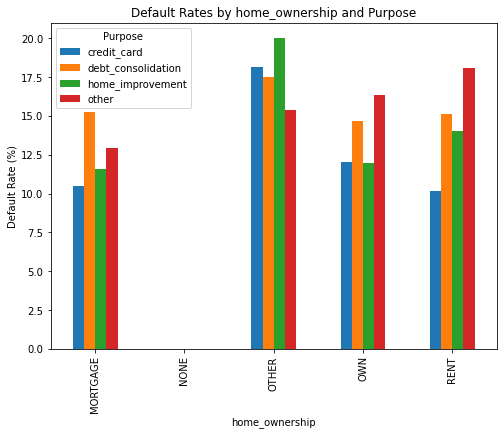

In [94]:
plot_segmented('home_ownership')

#### `year`

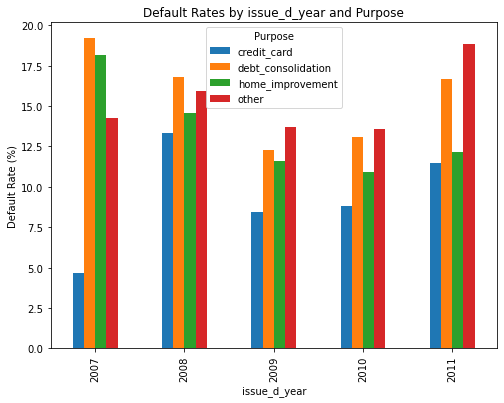

In [95]:
plot_segmented('issue_d_year')

#### `emp_length`

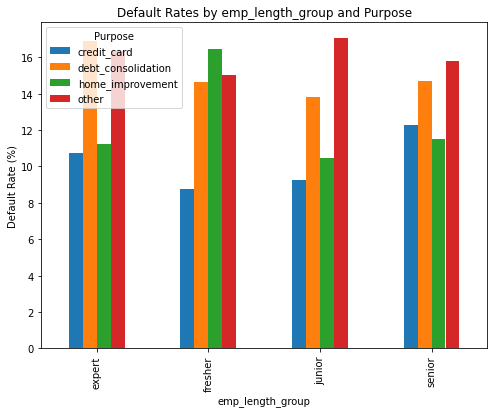

In [96]:
plot_segmented('emp_length_group')

> Loan Amount (`loan_amnt`) 

> How's the pattern compared with loan purposes?

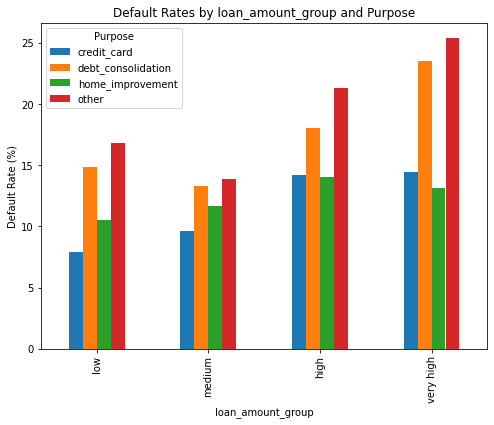

In [97]:
plot_segmented('loan_amount_group')

> interest rate (`int_rate`)

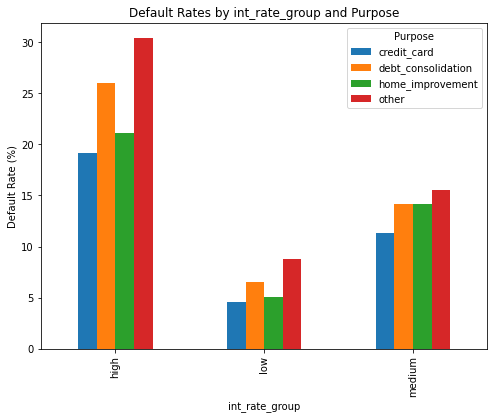

In [98]:
plot_segmented('int_rate_group')

> `installment`

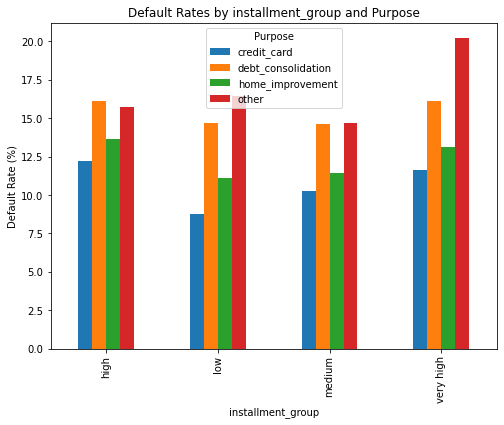

In [99]:
plot_segmented('installment_group')

> debt-to-income (`dti`) ratio

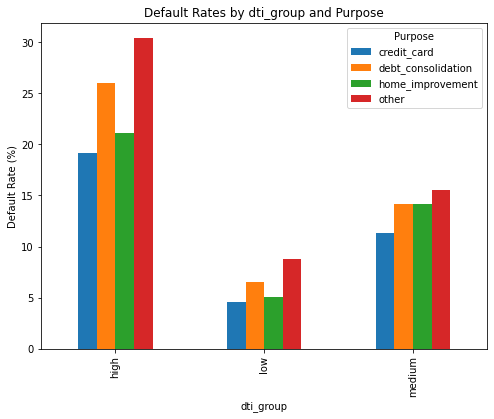

In [100]:
plot_segmented('dti_group')

> Let's have a look at the role of `annual_income`

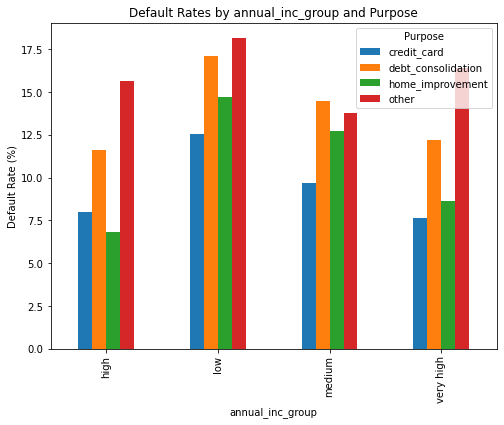

In [101]:
plot_segmented('annual_inc_group')

> A good way to quantify the effect of a categorical variable on default rate is to see `how much does the default rate vary across the categories`. 

> Let's see an example using `annual_inc` as the categorical variable.

> How would you examine the variation of default rate across `annual_inc`?

In [102]:
filtered_loan_status.groupby('annual_inc_group')['loan_status_label'].var().sort_values()

annual_inc_group
high         0.096557
very high    0.097063
medium       0.117557
low          0.138520
Name: loan_status_label, dtype: float64

#### Question 5.3 Write a function which takes in a categorical variable and computed the average default rate across the categories.

> You can also compute the `difference between the highest and the lowest default rate` across the categories, which is a decent metric indicating the effect of the varaible on default rate.

> Please create your own function named `diff_rate`.

In [103]:
def diff_rate(cat_var):
    df_catvar = filtered_loan_status.groupby((cat_var))['loan_status_label'].mean().reset_index()
    df_catvar['loan_status_label'] = df_catvar['loan_status_label']*100
    value_range = df_catvar['loan_status_label'].max() - df_catvar['loan_status_label'].min()
    average = df_catvar['loan_status_label'].mean()
    variance = df_catvar['loan_status_label'].var()
    print('Range = ' + str(value_range))
    print('Average = ' + str(average))
    print('Variance = ' + str(variance))    
    return df_catvar

In [104]:
# Breaking down the function, which calculates the default rate per categorical variable:
df_catvar = filtered_loan_status.groupby('grade')['loan_status_label'].mean().reset_index()
df_catvar['loan_status_label'] = df_catvar['loan_status_label']*100
df_catvar

,grade,loan_status_label
0,A,5.776398
1,B,11.928867
2,C,16.794889
3,D,21.791524
4,E,26.717557
5,F,32.638165
6,G,33.557047


> Please use the function and draw some insights :)

In [105]:
diff_rate('grade')

Range = 27.780649464337824
Average = 21.3149209135235
Variance = 109.57925713200784


,grade,loan_status_label
0,A,5.776398
1,B,11.928867
2,C,16.794889
3,D,21.791524
4,E,26.717557
5,F,32.638165
6,G,33.557047


In [106]:
diff_rate('annual_inc_group')

Range = 5.784759880509375
Average = 12.981439319962668
Variance = 7.534549267638127


,annual_inc_group,loan_status_label
0,high,10.825132
1,low,16.609892
2,medium,13.606379
3,very high,10.884354


In [107]:
diff_rate('int_rate_group')

Range = 19.21319012240379
Average = 15.480807820232464
Variance = 92.94069465630778


,int_rate_group,loan_status_label
0,high,25.554317
1,low,6.341127
2,medium,14.546980


> Thus, there is a ***`5.78%`*** increase in default rate as you go from high to low annual income. 

##### You might want to compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [108]:
diff_rate('grade')

Range = 27.780649464337824
Average = 21.3149209135235
Variance = 109.57925713200784


,grade,loan_status_label
0,A,5.776398
1,B,11.928867
2,C,16.794889
3,D,21.791524
4,E,26.717557
5,F,32.638165
6,G,33.557047


'Grade' has the greatest range (27.78%) increase in default rate from Grade A to Grade G.

# Thank you for listening! :D

### Variables in the Dataset

- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>